In [1]:
push!(LOAD_PATH, pwd())  # Append current directory to Julia LOAD_PATH

using RocketUtils
using Plots

const G = 1e-4;

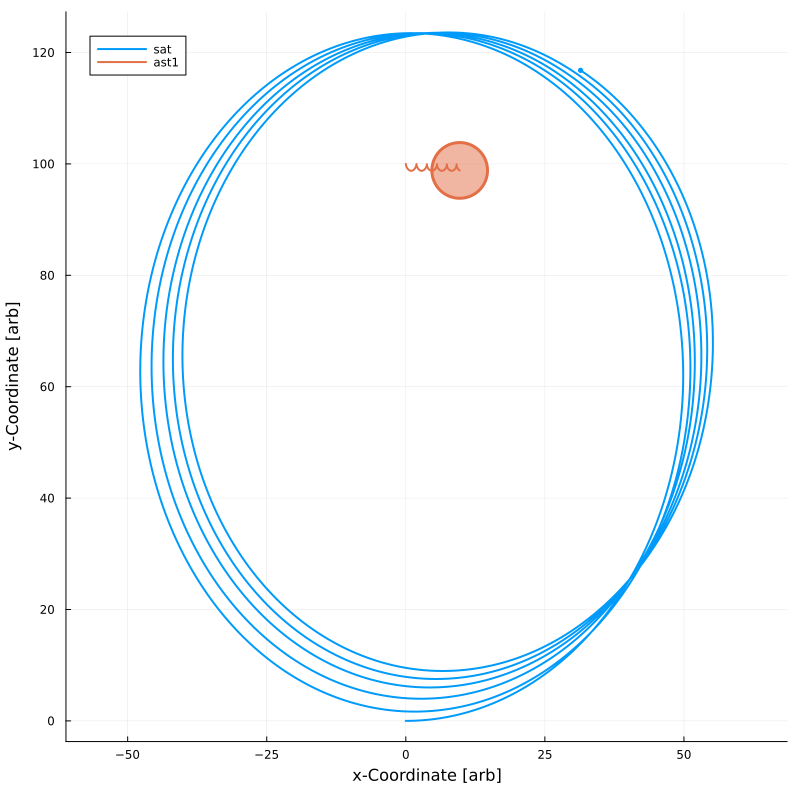

In [20]:
let 
    sat = Body(m=1., s=.2, r=[0. ; 0.], v=[.02 ; 0.], label="sat")
    ast1 = Body(m=1e2, s=5., r=[0. ; 100.], v=[0. ; 0.], label="ast1")
    # ast2 = Body(m=5e2, s=5., r=[-10. ; 30.], v=[-0.5 ; .1], label="ast2")
    # ast3 = Body(m=5e2, s=5., r=[2. ; 50.], v=[0.2 ; -0.2], label="ast3")

    # bs = [sat ; ast1 ; ast2 ; ast3]
    bs = [sat ; ast1]

    T = 50000.

    sol = solve_mb_ODE(bs, T; G=1e-3);

    ts = range(0., T; length=10000)
    p = plot(;size=(800, 800),
        xlabel="x-Coordinate [arb]",
        ylabel="y-Coordinate [arb]",
        aspect_ratio=:equal)
    
    for (i, b) in enumerate(bs)
        ind = (i - 1) * 4 + 1  # Index of output r vector for ith object.
        plot!(p, sol(ts)[ind, :], sol(ts)[ind + 1, :],
            lw=2, label=b.label, color=palette(:default)[i])
        plot!(p, obj_circle(b, [sol(T)[ind:ind+1]...]),
            fillrange=1, fillalpha=0.5, lw=3, label=nothing, color=palette(:default)[i])
    end

    display(p)  # Show plot
end